# Прогноз с использованием статистик churn rate и income rate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv #вычисление обратной матрицы
from sklearn.metrics import mean_absolute_error #поиск средней ошибки в абсолютном и квадратичном смысле

data = pd.read_csv("classes.csv")

In [47]:
data['start_at']= pd.to_datetime(data['start_at']) 
#data.sort_values(by = "start_at", inplace = True)
data['year'] = data['start_at'].dt.year
data['month'] = data['start_at'].dt.month
full_data = data.groupby(['year', 'month'])['teacher_id','student_id'].nunique()

Анализ данных за прошлые месяца на предмет оттока и приток учителей

In [48]:
students_left = list()
students_stayed = list()
students_new = list()

for i in range(2017,2020):
        for j in range(1,13):
            temp1 = data[(data['year'] == i) & (data['month']==j)].drop_duplicates(subset='student_id')
            if j == 12:
                j = 0
                i = i+1
            temp2 = data[(data['year'] == i) & (data['month']==j+1)].drop_duplicates(subset='student_id')
            stayed = pd.merge(temp1, temp2, on='student_id').count().student_id
            left = temp1.count().student_id - stayed
            came = temp2.count().student_id - stayed
            if temp1.size > 0:
                students_left.append(left)
                students_stayed.append(stayed)
                students_new.append(came)

teachers_left = list()
teachers_stayed = list()
teachers_new = list()

for i in range(2017,2020):
        for j in range(1,13):
            temp1 = data[(data['year'] == i) & (data['month']==j)].drop_duplicates(subset='teacher_id')
            if j == 12:
                j = 0
                i = i+1
            temp2 = data[(data['year'] == i) & (data['month']==j+1)].drop_duplicates(subset='teacher_id')
            stayed = pd.merge(temp1, temp2, on='teacher_id').count().teacher_id
            left = temp1.count().teacher_id - stayed
            came = temp2.count().teacher_id - stayed
            if temp1.size > 0:
                teachers_left.append(left)
                teachers_stayed.append(stayed)
                teachers_new.append(came)

In [49]:
full_data = pd.DataFrame(full_data)
full_data.columns = ["count_teachers", "count_students"]

In [51]:
full_data["students_stayed"] = full_data["students_left"] = full_data["students_new"] = 0
full_data["teachers_stayed"] = full_data["teachers_left"] = full_data["teachers_new"] = 0
full_data["students_churn_rate"] = full_data["teachers_churn_rate"] = full_data["teachers_income_rate"] = 0
#full_data["relation"] = full_data["relation"].astype('float64')
for i in range (1, 25):
    full_data.iloc[i, full_data.columns.get_loc('students_stayed')] = students_stayed[i-1]
    full_data.iloc[i, full_data.columns.get_loc('students_left')] = students_left[i-1]
    full_data.iloc[i, full_data.columns.get_loc('students_new')] = students_new[i-1]
    full_data.iloc[i, full_data.columns.get_loc('teachers_stayed')] = teachers_stayed[i-1]
    full_data.iloc[i, full_data.columns.get_loc('teachers_left')] = teachers_left[i-1]
    full_data.iloc[i, full_data.columns.get_loc('teachers_new')] = teachers_new[i-1]
    full_data.iloc[i, full_data.columns.get_loc('students_churn_rate')] = students_left[i-1]/full_data.iloc[i-1, full_data.columns.get_loc('count_students')]
    full_data.iloc[i, full_data.columns.get_loc('teachers_churn_rate')] = teachers_left[i-1]/full_data.iloc[i-1, full_data.columns.get_loc('count_teachers')]
    full_data.iloc[i, full_data.columns.get_loc('teachers_income_rate')] = teachers_new[i-1]/full_data.iloc[i-1, full_data.columns.get_loc('count_teachers')]
full_data

count_teachers  count_students  students_stayed  students_left  \
year month                                                                   
2017 9                1207            7084                0              0   
     10               1273            7934             4433           2651   
     11               1463            8832             5031           2903   
     12               1693           10435             5764           3068   
2018 1                1806           10340             6150           4285   
     2                2088           11723             6313           4027   
     3                2488           14645             7678           4045   
     4                2854           16221             9307           5338   
     5                3256           19428            11070           5151   
     6                3517           20816            12634           6794   
     7                3739           20990            12789           8027   
     8                4009           21709            13005           7985   
     9                4299           22864            13249           8460   
     10               4631           26637            14575           8289   
     11               4774           29633            17369           9268   
     12               4883           31768            19232          10401   
2019 1                5153           31152            19435          12333   
     2                5681           34275            19812          11340   
     3                6197           40261            22935          11340   
     4                6644           42981            25653          14608   
     5                7024           47087            28613          14368   
     6                7154           46351            29391          17696   
     7                7303           46333            28612          17739   
     8                7776           47973            29152          17181   
     9                8252           49486            29585          18388   

            students_new  teachers_stayed  teachers_left  teachers_new  \
year month                                                               
2017 9                 0                0              0             0   
     10             3501             1140             67           133   
     11             3801             1202             71           261   
     12             4671             1381             82           312   
2018 1              4190             1570            123           236   
     2              5410             1708             98           380   
     3              6967             1970            118           518   
     4              6914             2333            155           521   
     5              8358             2692            162           564   
     6              8182             3014            242           503   
     7              8201             3188            329           551   
     8              8704             3387            352           622   
     9              9615             3663            346           636   
     10            12062             3995            304           636   
     11            12264             4341            290           433   
     12            12536             4501            273           382   
2019 1             11717             4577            306           576   
     2             14463             4904            249           777   
     3             17326             5388            293           809   
     4             17328             5873            324           771   
     5             18474             6299            345           725   
     6             16960             6553            471           601   
     7             17721             6544            610           759   
     8             18821             6756            54

In [118]:
Y_true = full_data['count_teachers']
Y_true.index = range(25)

Y = np.matrix(Y_true).T
Y_train = Y[:-1]
A = np.matrix(np.concatenate((np.ones(shape = (Y_true.size-1, 1), dtype = int), np.arange(0,Y_true.size-1).reshape(Y_true.size-1,1)), axis=1))
#один месяц отрезаем для проверки

In [119]:
tetta = np.dot(np.dot(inv(np.dot(A.T,A)),A.T), Y_train)
a0 = float(tetta[0,0])
k = float(tetta[1,0])
print("Оценки параметров: a = {0}, k = {1} ".format(a0, k))

Оценки параметров: a = 810.0966666666673, k = 295.18000000000006 


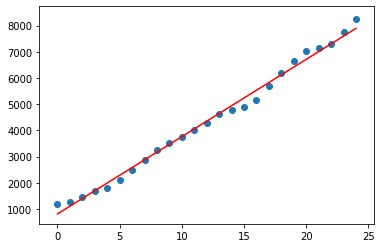

In [120]:
x = np.linspace(0, Y_train.size,Y_train.size + 1)
Y_pred = a0 + x * k

plt.plot(x, Y_pred, '-r')
plt.scatter(Y_true.index, Y_true)
plt.show()

In [124]:
churn = full_data.loc[2018:2020].groupby(['month'])['teachers_churn_rate', 'teachers_income_rate'].mean()

In [122]:
print("Предсказанное количество преподавателей в следующем месяце ", (a0 + (Y_train.size + 1) * k + (a0 + (Y_train.size + 1) * k)*(churn['teachers_income_rate'][10]-churn['teachers_churn_rate'][10])))

Предсказанное количество преподавателей в следующем месяце  8822.056795378772
